In [13]:
import polars as pl
import numpy as np
import torch
from torchvision.transforms import v2
from PIL import Image
import io
import matplotlib.pyplot as plt

from pathlib import Path

DATA_PATH = Path.cwd().parent / "data"

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 4060 Laptop GPU


In [22]:
transforms = v2.Compose([
    v2.ToImage(),  # Convert to tensor, only needed if you had a PIL image
    v2.ToDtype(torch.uint8, scale=True),  # optional, most input are already uint8 at this point
    v2.Resize(size=(224, 224), antialias=True),  # Or Resize(antialias=True)
    v2.ToDtype(torch.float32, scale=True),  # Normalize expects float input
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [23]:
data = pl.scan_parquet(DATA_PATH / "food101-validation.parquet")

In [24]:
data.head(1).collect()

image,label
struct[2],i64
"{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x03\x04Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0a\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00\x86\x01\x10\x00\x02\x00\x00\x00\x09""…,""1827892.jpg""}",6


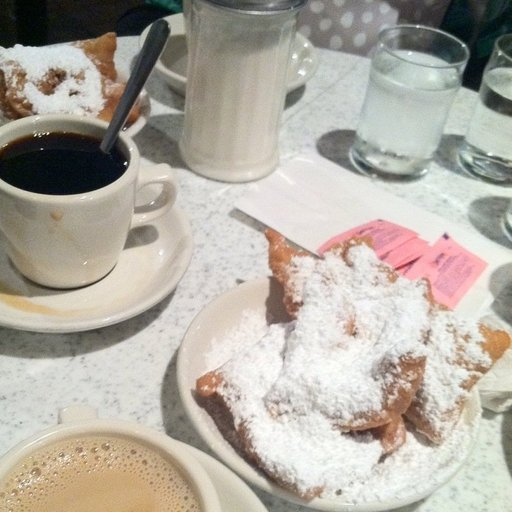

In [25]:
image = Image.open(io.BytesIO(data.head(1).collect()[0]['image'][0]['bytes']))
image

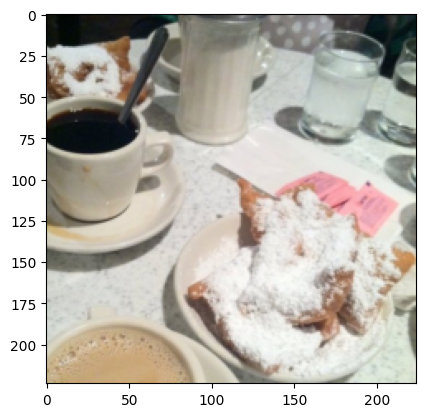

In [26]:
transformed = transforms(np.array(image)/255)

transformed_image = v2.ToPILImage()(transformed)
plt.imshow(transformed_image)

In [27]:
np.array(transformed)

array([[[   0.070588,    0.062745,    0.078431, ...,    0.094118,     0.10196,    0.062745],
        [   0.054902,    0.066667,     0.07451, ...,     0.10588,    0.090196,    0.043137],
        [   0.062745,    0.058824,    0.062745, ...,     0.11765,    0.082353,    0.058824],
        ...,
        [    0.78039,     0.78039,      0.7451, ...,     0.82745,     0.84314,     0.83529],
        [    0.75294,     0.78039,     0.77647, ...,     0.83529,     0.82745,     0.83529],
        [    0.78824,     0.78431,     0.79216, ...,     0.84706,     0.81176,         0.8]],

       [[    0.07451,     0.07451,    0.090196, ...,     0.16078,     0.17647,     0.14118],
        [   0.062745,    0.078431,    0.086275, ...,     0.16471,     0.16078,     0.12157],
        [   0.066667,    0.070588,     0.07451, ...,     0.17255,     0.15294,     0.13333],
        ...,
        [     0.6902,     0.69804,     0.66667, ...,      0.8549,     0.87059,     0.86275],
        [    0.65882,     0.69412,     0.6

In [28]:
from ultralytics import SAM

# Load a model
model = SAM("sam2.1_l.pt")

# Display model information (optional)
model.info()

# Run inference
model(transformed.unsqueeze(0).to(device))

Model summary: 854 layers, 224,446,642 parameters, 224,446,642 gradients



RuntimeError: shape '[1, -1, 64, 64]' is invalid for input of size 50176